In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn
seaborn.set_style("whitegrid")

import util
from calculateAge import star_formation_gupta

In [15]:
x = np.linspace(0,13, num=208)
num = len(x)

|name |  tau | tStart | sfTrans | sfSlope | description                |
|-----|------|--------|---------|---------|----------------------------|
|c1   |  0.5 | 1.5    | 9.0     | -1.0    | old                        |
|c2   |  0.5 | 1.5    | 9.0     | 15.0    | sharp burst & young        |
|c3   |  7.0 | 3.0    | 10.0    | 15.0    | flat burst & young         |
|c4   |  7.0 | 3.0    | 13.0    | 0.0     | flat burst                 |
|c5   |  0.5 | 1.5    | 9.0     | -1.0    | metal poor, like c1        |
|c6   |  7.0 | 3.0    | 10.0    | 15.0    | dusty, like c2             |
|c7   |  0.5 | 1.5    | 6.0     | 15.0    | mostly late linear, like c2|
|c8   |  0.1 | 8.0    | 12.0    | 20.0    | very young                 |

In [6]:
from scipy.integrate import trapz

In [16]:
# sfh = np.fromiter(map(star_formation_gupta, x, [0.6]*num, [8]*num, [0.03]*num), dtype=np.float)
# sfh = sfh/max(sfh)

# sfh2 = np.fromiter(map(star_formation_gupta, x, [8]*num, [8]*num, [0.03]*num), dtype=np.float)
# sfh2 = sfh2/max(sfh2)

# sfh3 = np.fromiter(map(star_formation_gupta, x, [1]*num, [12]*num, [0.35]*num), dtype=np.float)
# sfh3 = sfh3/max(sfh3)

# sfh4 = np.fromiter(map(star_formation_gupta, x, [7]*num, [12]*num, [0.35]*num), dtype=np.float)
# sfh4 = sfh4/max(sfh4)



# x = np.linspace(0,13, num=104)
sfh1 = np.fromiter(map(star_formation_gupta, x, [0.5]*num, [7.5]*num, [-1.0]*num), dtype=np.float)
# sfh1 = sfh1/max(sfh1)
sfh1 = sfh1/trapz(sfh1, x)

sfh2 = np.fromiter(map(star_formation_gupta, x, [0.5]*num, [7.5]*num, [.15]*num), dtype=np.float)
# sfh2 = sfh2/max(sfh2)
sfh2 = sfh2/trapz(sfh2, x)

sfh3 = np.fromiter(map(star_formation_gupta, x, [7]*num, [7]*num, [.15]*num), dtype=np.float)
# sfh3 = sfh3/max(sfh3)
sfh3 = sfh3/trapz(sfh3, x)

sfh4 = np.fromiter(map(star_formation_gupta, x, [7]*num, [13]*num, [0]*num), dtype=np.float)
# sfh4 = sfh4/max(sfh4)
sfh4 = sfh4/trapz(sfh4, x)

/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


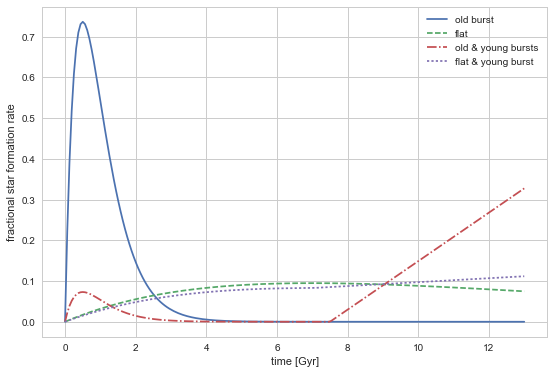

In [29]:
fig = plt.figure('star formation')

plt.plot(x, sfh1, label="old burst")

# plt.plot(x_sp, np.flip(fsps_sfh, 0), label='FSPS')
# plt.plot(x_sp, np.flip(fsps_sfh2, 0), label='FSPS 2')

# plt.plot(x_sp, fsps_sfh, label='FSPS')
# plt.plot(x_sp, fsps_sfh2, label='FSPS 2')

plt.plot(x, sfh4, '--', label="flat")
plt.plot(x, sfh2, '-.', label="old & young bursts")
plt.plot(x, sfh3, ':', label="flat & young burst")

# plt.ylim(0, 0.5)

plt.legend()
# plt.legend(frameon = 1).get_frame().set_facecolor('white')
plt.xlabel('time [Gyr]')
plt.ylabel(r'fractional star formation rate')

fig.set_tight_layout({'pad': 1.5})   #cut edge whitespace

plt.savefig('figures/sfh.pdf')
plt.show()
# scaled to the maximum, FSPS scales for equal area under the curves.
# values match those in circle consistance test table

In [5]:
# alternative
sp = util.get_sp()

In [63]:
sp.params['tau'] = 0.5
sp.params['sf_trunc'] =  7.5
sp.params['sf_slope'] = 15.0
fsps_sfh = sp.sfr
fsps_sfh = fsps_sfh/max(fsps_sfh)

sp.params['tau'] = 0.5
sp.params['sf_trunc'] =  4
sp.params['sf_slope'] = 15.0
fsps_sfh2 = sp.sfr
fsps_sfh2 = fsps_sfh2/max(fsps_sfh2)

# x_sp = np.linspace(0, 13, len(fsps_sfh))
x_sp = np.logspace(0, 1.292, len(fsps_sfh))
# x_sp = 10**(sp.log_age-6.0)

In [34]:
sp.params['sf_start']
sp.params['sfh']

5